### From Question: Target column has four types of network congestion(including No Congestion). We will train a logistic regression algorithm to build a model that can predict the type of network congestion.

In [1]:
# Load the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [2]:
# Load the data from file
DF = pd.read_csv("network_congestion.csv")
DF.shape

(78560, 39)

There are 78560 records and 39 columns. Out of 39 cols, 1 col will be dependent variable.
So we can say, we have 38 independent variables.

<b>DF</b> holds the actual dataset.

In [3]:
# Check few records
DF.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


From the above overview of the data, we can find
1. ran_vendor and Congestion_Type are not numerical data. Congestion_Type is our target variable (dependent).
2. cell_name is numeric, but it specifies some identity, which may not have much value towards target. Also as per information given in question, its the unique id for the cellular network. 
3. par_year, par_month, par_day, par_hour, par_min: these are timestamp of data collection. We will see how these contribute value towards target. 

In [4]:
#Lets check the datatypes of each column
DF.dtypes

cell_name                         int64
4G_rat                            int64
par_year                          int64
par_month                         int64
par_day                           int64
par_hour                          int64
par_min                           int64
subscriber_count                  int64
web_browsing_total_bytes          int64
video_total_bytes                 int64
social_ntwrking_bytes             int64
cloud_computing_total_bytes       int64
web_security_total_bytes          int64
gaming_total_bytes                int64
health_total_bytes                int64
communication_total_bytes         int64
file_sharing_total_bytes          int64
remote_access_total_bytes         int64
photo_sharing_total_bytes         int64
software_dwnld_total_bytes        int64
marketplace_total_bytes           int64
storage_services_total_bytes      int64
audio_total_bytes                 int64
location_services_total_bytes     int64
presence_total_bytes              int64


From above, we can see all features are int64 apart from ran_vendor and Congestion_Type, as expected. 
So there is no object or string type in any of the numeric columns. 
Also it means there is no missing values in any numeric columns.

Missing values might present in ran_vendor.

Let's check if any null values to confirm if we have missing values or not

In [5]:
DF.isnull().values.any()

False

So there is no missing values in any columns.

In [6]:
DF.describe()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt
count,7.856000e+04,78560.000000,78560.0,78560.0,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,...,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000
mean,2.785900e+09,0.499173,2018.0,12.0,15.503831,11.514588,33.061736,571.187131,8091.673002,8293.335871,...,70.619539,70.689779,70.987156,70.945481,70.594857,70.719297,69.728182,89.991701,4.492146,3.503055
std,1.604667e+09,0.500002,0.0,0.0,8.634375,6.934351,16.535863,1080.263507,19145.523831,19462.783122,...,117.255264,118.102336,117.821916,117.134609,117.647164,118.032907,114.619303,17.638370,1.709296,1.115255
min,8.737700e+04,0.000000,2018.0,12.0,1.000000,0.000000,5.000000,1.000000,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.000000,2.000000
25%,1.395260e+09,0.000000,2018.0,12.0,8.000000,5.000000,20.000000,71.000000,431.000000,471.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,75.000000,3.000000,3.000000
50%,2.786354e+09,0.000000,2018.0,12.0,16.000000,12.000000,35.000000,187.000000,1545.500000,1672.500000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,90.000000,4.000000,4.000000
75%,4.172220e+09,1.000000,2018.0,12.0,23.000000,18.000000,45.000000,568.000000,6565.000000,6884.250000,...,75.000000,75.000000,75.000000,76.000000,74.000000,75.000000,75.000000,105.000000,6.000000,4.000000
max,5.555540e+09,1.000000,2018.0,12.0,30.000000,23.000000,60.000000,16570.000000,311008.000000,331271.000000,...,1560.000000,1612.000000,1563.000000,1680.000000,1661.000000,1611.000000,1600.000000,120.000000,7.000000,5.000000


From above table, we can see:
- For subscriber_count: min value is 1, Max is 16570 and mean is greater than Q3, that means this seems highly right skewed.
- Similar case for few of the data-bytes-used columns. Hence bytes-used data are also right skewed.

This might be because of more subscribers in any particular network lead to more data usage (bytes used for browsing, sharing, downloading etc). As logistic regression assumes that the features should be independent of each other and there should not be any relationship among them, so we will not try to find any correlation, but in real data, there might be some relationship among features.

In [7]:
# Let's check how many unique values in each column, 
# to make sure that all features have a range of values which contributes towards target.
DF.nunique()

cell_name                        78560
4G_rat                               2
par_year                             1
par_month                            1
par_day                             30
par_hour                            24
par_min                             12
subscriber_count                  4950
web_browsing_total_bytes         21245
video_total_bytes                21580
social_ntwrking_bytes            21655
cloud_computing_total_bytes       5370
web_security_total_bytes          1019
gaming_total_bytes                 983
health_total_bytes                 997
communication_total_bytes        16074
file_sharing_total_bytes           276
remote_access_total_bytes          263
photo_sharing_total_bytes          573
software_dwnld_total_bytes         579
marketplace_total_bytes            476
storage_services_total_bytes       982
audio_total_bytes                  479
location_services_total_bytes     1007
presence_total_bytes             15904
advertisement_total_bytes

'cell_name' has 78560 unique values, it's same as total number of rows. 
As it's an id for each record and will not give any value. We can drop it.

'par_year' and 'par_month' have only 1 unique value, the value is same for all the rows(Data collected in Dec 2018),
so definitely it does not give any value.  We can drop both of the columns.

Rest all features have unique values. 
- ran_vendor has 3 values (i.e. 3 vendors)
- Congestion_Type has 4 unique values (i.e. 4 target classes, also mentioned in question).

In [8]:
print("Vendor:", DF.ran_vendor.unique())
print("Congestion_Type:", DF.Congestion_Type.unique())

Vendor: ['ERICSSON' 'NOKIA' 'HUAWEI']
Congestion_Type: ['4G_BACKHAUL_CONGESTION' 'NC' '3G_BACKHAUL_CONGESTION'
 '4G_RAN_CONGESTION']


- As vendor is categorical, we need to assign labels to each vendor.(We can use one-hot encoding as all vendors have same level of priority).
- Congestion_Type defines the different network congestions. No Congestion is always better than any type of congestion. So here priorities are not at same level, So we may have to assign different labels to each congestion type. (We may use label encoder)

In [9]:
#DF.groupby(['ran_vendor']).count()
DF.ran_vendor.value_counts()

ERICSSON    26209
HUAWEI      26183
NOKIA       26168
Name: ran_vendor, dtype: int64

Above result shows an equal amount of data from all vendors.

In [10]:
DF.Congestion_Type.value_counts()

NC                        19771
4G_BACKHAUL_CONGESTION    19765
3G_BACKHAUL_CONGESTION    19688
4G_RAN_CONGESTION         19336
Name: Congestion_Type, dtype: int64

- Data for NC has more records compared to other classes, but difference is not significant.
- And data for "4G_RAN_CONGESTION" is least, but again not a large difference(~400 i.e. ~2%).

So Data seems to be fairly distributed for all the classes, hence the model should not be biased to any particular class.

Above results can be viewed visually with help of bar graph.

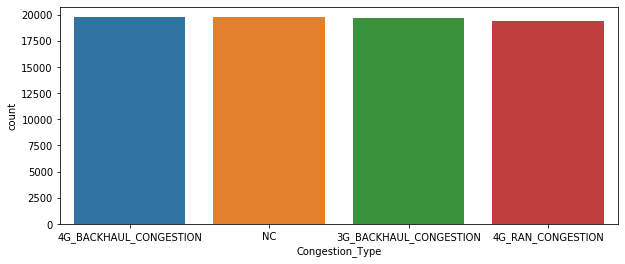

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(DF.Congestion_Type, ax=ax);

In [12]:
DF.groupby(["Congestion_Type"]).count()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor
Congestion_Type,,,,,,,,,,,,,,,,,,,,,
3G_BACKHAUL_CONGESTION,19688,19688,19688,19688,19688,19688,19688,19688,19688,19688,...,19688,19688,19688,19688,19688,19688,19688,19688,19688,19688
4G_BACKHAUL_CONGESTION,19765,19765,19765,19765,19765,19765,19765,19765,19765,19765,...,19765,19765,19765,19765,19765,19765,19765,19765,19765,19765
4G_RAN_CONGESTION,19336,19336,19336,19336,19336,19336,19336,19336,19336,19336,...,19336,19336,19336,19336,19336,19336,19336,19336,19336,19336
NC,19771,19771,19771,19771,19771,19771,19771,19771,19771,19771,...,19771,19771,19771,19771,19771,19771,19771,19771,19771,19771


In [13]:
#From above analysis, lets delete 3 cols: 'cell_name', 'par_year' and 'par_month'. 
DF_data = DF.drop(['cell_name', 'par_year', 'par_month'], axis=1)
DF_data.shape

(78560, 36)

<b>DF_data</b> holds the required dataset, after removing 3 cols such as 'cell_name', 'par_year' and 'par_month'.

We did not drop columns like par_day, par_hour and par_min, as these might have some information like,
- par_day: Which day what type of congestion exists, and NC or any congestion is more/less in any particular day.
- par_hour: At what hour of day, congestion is more/less or NC, e.g. the case might be at night there is No Congestion.
- par_min: At what exact time, what type of congestion occurs.

In [14]:
DF_data.head()

,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1,15,0,50,152,315,59012,2266,1034,113,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,1,7,20,5,54,1871,334,4530,63,29,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,1,5,16,35,277,887,945,23753,171,18,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,0,16,21,60,51,8577,494,7956,66,60,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,1,4,6,60,117,2084,1056,7244,232,59,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


Now We need to encode categorical columns (ran_vendor and Congestion_Type).

In [15]:
# Let's assign values to vendors
DF_data = pd.get_dummies(DF_data, columns=['ran_vendor'], drop_first=True)
DF_data.shape

(78560, 37)

In [16]:
DF_data.head()

,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,...,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,Congestion_Type,ran_vendor_HUAWEI,ran_vendor_NOKIA
0,1,15,0,50,152,315,59012,2266,1034,113,...,33,46,39,103,69,6,2,4G_BACKHAUL_CONGESTION,0,0
1,1,7,20,5,54,1871,334,4530,63,29,...,20,7,10,21,93,7,5,NC,0,1
2,1,5,16,35,277,887,945,23753,171,18,...,91,49,147,159,77,6,3,3G_BACKHAUL_CONGESTION,0,0
3,0,16,21,60,51,8577,494,7956,66,60,...,63,42,75,35,95,7,2,3G_BACKHAUL_CONGESTION,1,0
4,1,4,6,60,117,2084,1056,7244,232,59,...,59,91,197,316,112,3,5,4G_RAN_CONGESTION,1,0


ran_vendor has been encoded and 2 columns have been created (drop_first=True), such as ran_vendor_HUAWEI and ran_vendor_NOKIA. When both have value 0, it means its vendor ERICSSON.

In [17]:
# Assign labels to target classes
le = preprocessing.LabelEncoder()
le.fit(DF_data.Congestion_Type)
print("classes:", le.classes_)
print("Encoded values:", le.transform(le.classes_))

DF_data.Congestion_Type = le.transform(DF_data.Congestion_Type)
print("Congestion_Type datatype:", DF_data.Congestion_Type.dtypes)
DF_data.head()


classes: ['3G_BACKHAUL_CONGESTION' '4G_BACKHAUL_CONGESTION' '4G_RAN_CONGESTION'
 'NC']
Encoded values: [0 1 2 3]
Congestion_Type datatype: int32


,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,...,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,Congestion_Type,ran_vendor_HUAWEI,ran_vendor_NOKIA
0,1,15,0,50,152,315,59012,2266,1034,113,...,33,46,39,103,69,6,2,1,0,0
1,1,7,20,5,54,1871,334,4530,63,29,...,20,7,10,21,93,7,5,3,0,1
2,1,5,16,35,277,887,945,23753,171,18,...,91,49,147,159,77,6,3,0,0,0
3,0,16,21,60,51,8577,494,7956,66,60,...,63,42,75,35,95,7,2,0,1,0
4,1,4,6,60,117,2084,1056,7244,232,59,...,59,91,197,316,112,3,5,2,1,0


After label encoding, we can see Congestion types are assigned with 0, 1, 2 and 3.
- 3G_BACKHAUL_CONGESTION : 0
- 4G_BACKHAUL_CONGESTION : 1
- 4G_RAN_CONGESTION : 2
- NC : 3

In [18]:
DF_data.Congestion_Type.dtypes

dtype('int32')

Now <b>Congestion_Type</b> column holds target variables as integer datatype.

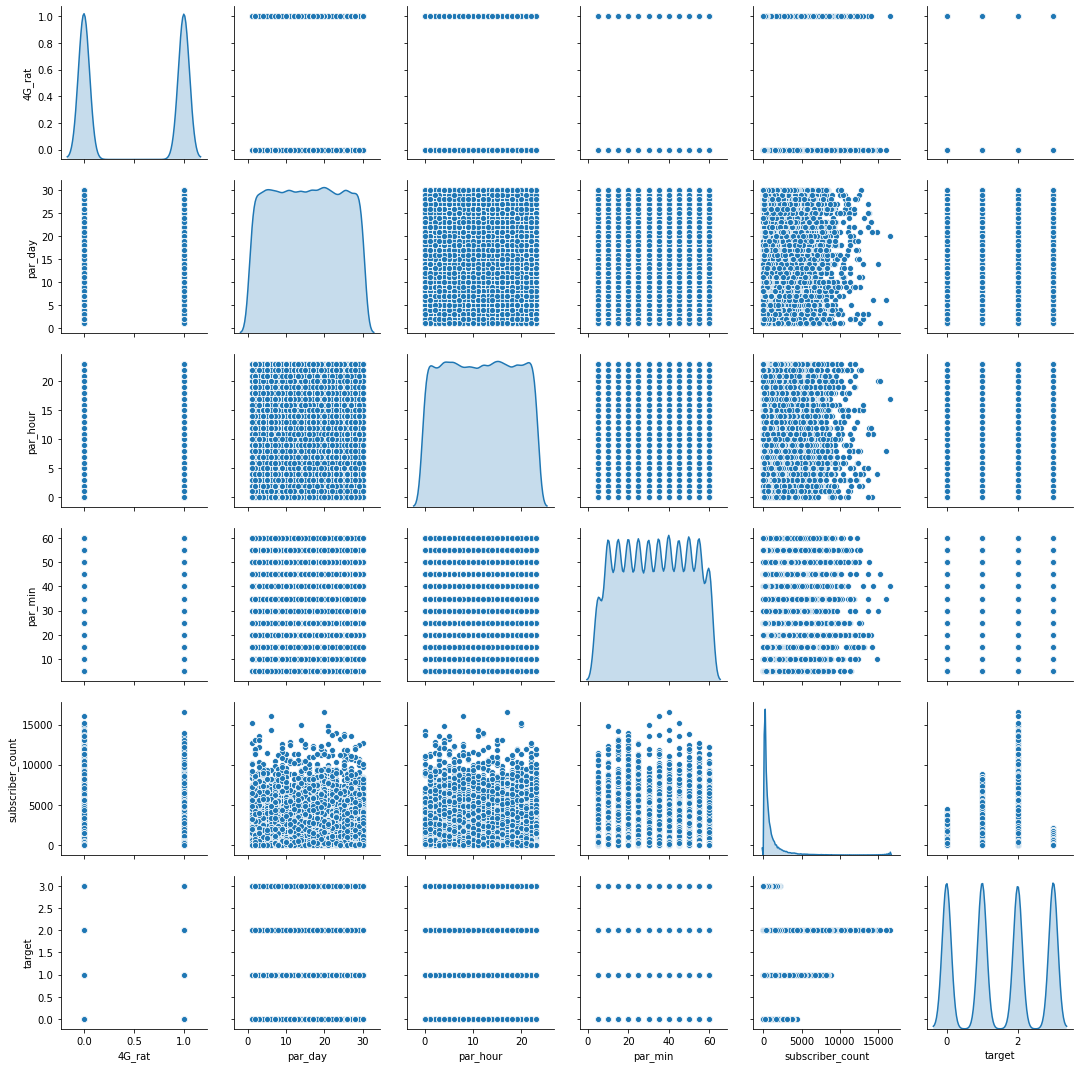

In [19]:
#Lets analyse relationships of the data
#As there are many features, so we will see few features at a time.
DF_data_chunk1 = DF_data.iloc[:, 0:5]
DF_data_chunk1['target'] = DF_data.Congestion_Type
sns.pairplot(DF_data_chunk1, diag_kind='kde');
#DF_data_v_L6 = DF_data_vy.iloc[:, 30:37]
#sns.pairplot(DF_data_v_L6);

Congestion_Type is target here.
- From target histogram(KDE), we can see all 4 classes are almost equally distributed.
- subsciber_count is highly right skewed, might be because of more subscribers in one network.
- From target vs subscriber_count scatter plot. we can see there are more subscribers for class 2, i.e. 4G_RAN_CONGESTION, which may result in more data bytes usage from subscribers. 
- par_day, par_hour, par_min being the timestamp, overally they are equally contributing towards no congestion or any type of congestion.

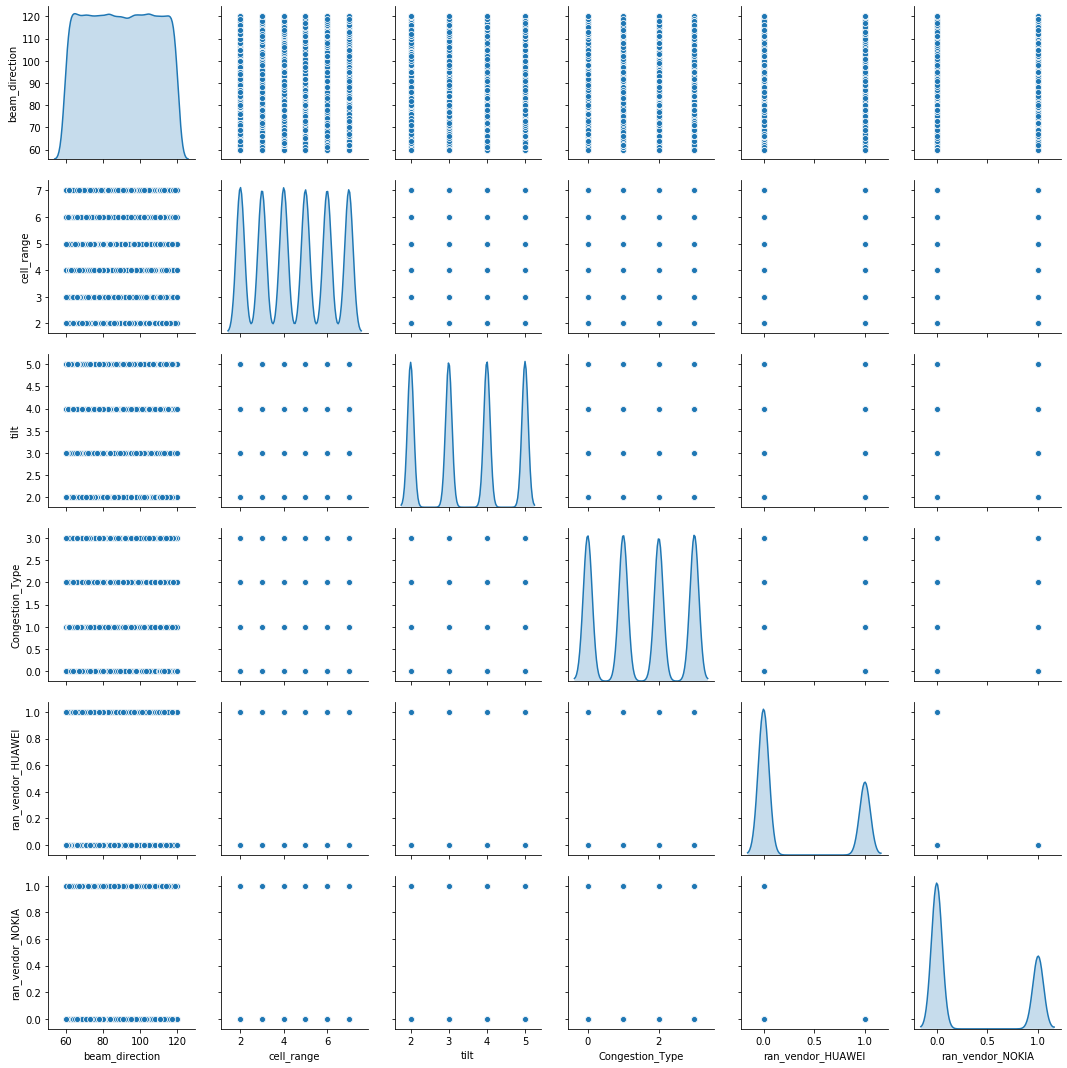

In [20]:
#print(DF_data.columns)
#DF_data.loc[:, 'beam_direction':'ran_vendor_NOKIA']
DF_data_chunk2 = DF_data.loc[:, 'beam_direction':'ran_vendor_NOKIA']
#DF_data_chunk1['target'] = DF_data.Congestion_Type
sns.pairplot(DF_data_chunk2, diag_kind='kde');

- beam_direction, cell_range, tilt, and ran_vendor are uniformly contributing towards congestion_Type, so deriving a relationship with target is difficult.

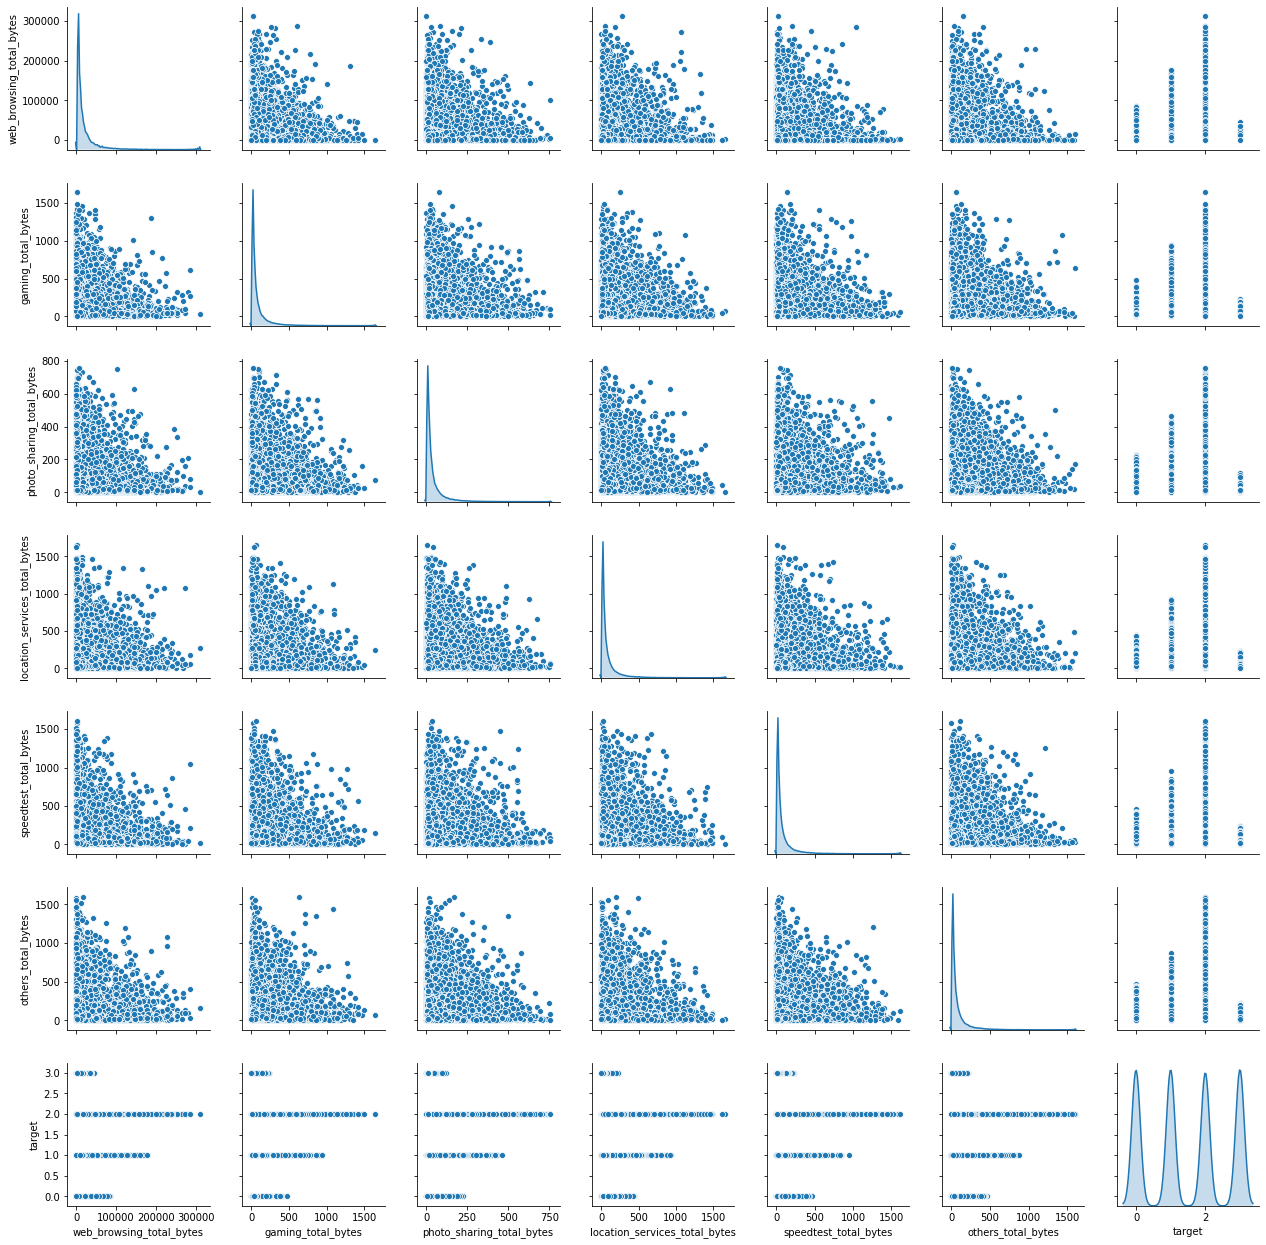

In [21]:
#DF_data.columns

DF_data_chunk3 = DF_data.loc[:, 'web_browsing_total_bytes':'others_total_bytes':5]
DF_data_chunk3['target'] = DF_data.Congestion_Type
#DF_data_chunk1['target'] = DF_data.Congestion_Type
sns.pairplot(DF_data_chunk3, diag_kind='kde');

Here I have taken few of the data usage(in bytes) features, which shows:
- As more subscribers in class 2, so more data bytes used in class 2 from almost all categories(web browsing, photo sharing, location service etc).
- Also as mentioned earlier, almost all data bytes usage are right skewed and outliers are present.

In [22]:
corr = DF_data.corr()
#print(corr)

correlation table is huge due to many features, so printing it consumes lots of space. Rather we can visualize the same through heatmap.

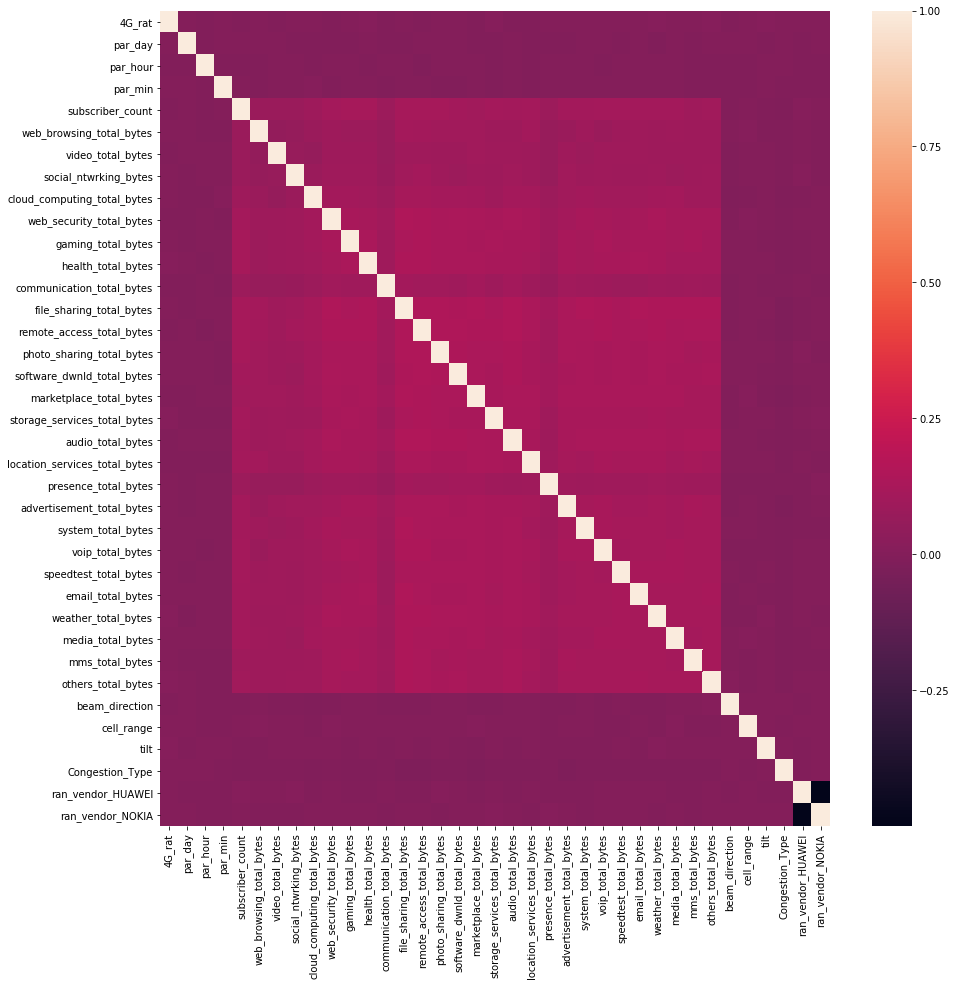

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, ax=ax); #, cmap='YlGnBu'

In above plot light pink colour represents maximum correlation and black colour represents least correlation.
We can see none of the variables have strong correlation with any other variables.

In [24]:
DF_data.head()

,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,...,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,Congestion_Type,ran_vendor_HUAWEI,ran_vendor_NOKIA
0,1,15,0,50,152,315,59012,2266,1034,113,...,33,46,39,103,69,6,2,1,0,0
1,1,7,20,5,54,1871,334,4530,63,29,...,20,7,10,21,93,7,5,3,0,1
2,1,5,16,35,277,887,945,23753,171,18,...,91,49,147,159,77,6,3,0,0,0
3,0,16,21,60,51,8577,494,7956,66,60,...,63,42,75,35,95,7,2,0,1,0
4,1,4,6,60,117,2084,1056,7244,232,59,...,59,91,197,316,112,3,5,2,1,0


In [25]:
#Lets separate the independent variables and dependent variable
X = DF_data.drop(['Congestion_Type'], axis=1)
y = pd.DataFrame(DF_data['Congestion_Type'], columns=['Congestion_Type'])
print(X.shape, y.shape)

(78560, 36) (78560, 1)


Now we have 36 independent variables.

### Start model training

In [26]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54992, 36), (23568, 36), (54992, 1), (23568, 1))

In [27]:
X_train.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0] 

(0.7, 0.3)

Data split with 70:30 ratio.
- Train set: 70%
- Test set: 30%

In [28]:
#Lets create a model
model = LogisticRegression()
model.fit(X_train, y_train)

#predict on test dataset
y_predict = model.predict(X_test)
#print(y_predict)

model_score_train = model.score(X_train, y_train)
print("Train score:", model_score_train)

model_score = model.score(X_test, y_test)
print("Test Score:", model_score)

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train score: 0.7351614780331684
Test Score: 0.7350644942294636


We got Training accuracy as 73.51% and Testing accuracy as 73.50%.
Testing performed well and similar to training performance. But overally model did not perform well, if we see ~73%.

One reason can be, as the data in our dataset contain different units like day, hour, min, bytes and some counts, so ranges will vary for them. We can try to bring all data into same unit or unitless (same range) by normalizing the data.

In [29]:
#coef_df = pd.DataFrame(model.coef_, columns=X_train.columns)
#coef_df['intercept'] = model.intercept_
#print(coef_df)

In [30]:
# Let's Normalize the data.
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [31]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.002440,1.564278,-0.792629,-0.787731,-0.484090,-0.205898,-0.410255,-0.316201,-0.125719,-0.516431,...,-0.537996,-0.468884,0.339282,-0.201626,-0.522157,0.795684,1.472519,-0.450599,-0.707985,-0.705034
1,-0.997566,1.680346,0.792377,-1.392329,0.256280,-0.332591,-0.367818,-0.389074,-0.339332,-0.397647,...,-0.486635,1.205568,-0.567370,-0.423893,-0.487107,1.191873,0.300480,1.343251,-0.707985,1.418371
2,-0.997566,-1.685622,-1.224903,1.328365,0.187191,-0.397037,-0.400348,0.053832,-0.466862,-0.482492,...,-0.443834,-0.520143,0.108342,0.020641,0.406686,-0.619277,-0.871559,-0.450599,-0.707985,-0.705034
3,-0.997566,-0.060672,1.368743,-1.392329,-0.448612,-0.253748,-0.385743,-0.127842,-0.493165,-0.177049,...,-0.589357,-0.579945,-0.490390,-0.210175,-0.311853,-1.015466,1.472519,0.446326,1.412460,-0.705034
4,-0.997566,-0.641012,-1.368995,0.723766,0.084492,-0.373217,-0.400858,1.639855,-0.469253,-0.194018,...,-0.563677,5.545473,-0.088384,-0.235821,0.327822,1.474865,-0.285540,-1.347524,-0.707985,-0.705034


###  Model 2
After scaling the data, Let's try the model.

In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train.Congestion_Type)
y_predict = model.predict(X_test_scaled)
model_score_train = model.score(X_train_scaled, y_train.Congestion_Type)
print("Train score:", model_score_train)

model_score = model.score(X_test_scaled, y_test.Congestion_Type)
print("Test Score:", model_score)

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train score: 0.772221414023858
Test Score: 0.7712152070604209


Now We got Training accuracy as 77.22% and Testing accuracy as 77.12%. Accuracy improved compared to earlier model (say model 1)

We have got some warnings, We can provide default values to get rid of warnings. 
Also we can try with different values other than default values to improve the accuracy.

#### Accuracy can be misleading when data is skewed (earlier we saw, many columns are right skewed), so we will look into other performance measures like Precision, Recall, F1-score etc.

In [33]:
# Let's check the confusion matrix.
m2_cm = metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(m2_cm)
print()
# Let's check other measures such as Precision, Recall and F1-score.
m2_cr = metrics.classification_report(y_test, y_predict)
print(m2_cr)

Confusion Matrix:
[[4461  369    2 1017]
 [1189 3032 1790   21]
 [  57  614 5147    0]
 [ 333    0    0 5536]]

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5849
           1       0.76      0.50      0.60      6032
           2       0.74      0.88      0.81      5818
           3       0.84      0.94      0.89      5869

    accuracy                           0.77     23568
   macro avg       0.77      0.77      0.76     23568
weighted avg       0.77      0.77      0.76     23568



### Model 3
Let's try the model again with different values other than default values.

In [34]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', C=0.1)
model.fit(X_train_scaled, y_train.Congestion_Type)
y_predict = model.predict(X_test_scaled)
model_score_train = model.score(X_train_scaled, y_train.Congestion_Type)
print("Train score:", model_score_train)

model_score = model.score(X_test_scaled, y_test.Congestion_Type)
print("Test Score:", model_score)

Train score: 0.7913151003782368
Test Score: 0.7914545145960624


Now We got Training accuracy as <b>79.13%</b> and Testing accuracy as <b>79.14%</b> by adjusting the parameters in LogisticRegression. Accuracy improved compared to earlier model (i.e. model 2)

Let's see the confusion matrix and other performance measures (Precision, Recall and F1-score).

In [35]:
m3_cm = metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(m3_cm)
print()

m3_cr = metrics.classification_report(y_test, y_predict)
print(m3_cr)

Confusion Matrix:
[[4496  566    0  787]
 [ 890 4237  895   10]
 [  35 1247 4536    0]
 [ 485    0    0 5384]]

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      5849
           1       0.70      0.70      0.70      6032
           2       0.84      0.78      0.81      5818
           3       0.87      0.92      0.89      5869

    accuracy                           0.79     23568
   macro avg       0.79      0.79      0.79     23568
weighted avg       0.79      0.79      0.79     23568



We can see the confusion matrix above, from which we can calculate the Precision, Recall for each classes. We have used classification_report() function to get those measures.

We can see Precision, Recall and F1-score for each classes.

For 3 i.e. <b>NC</b>, we got <b>87% Precision</b>, which means 87% are actually correct out of total predicted positives.
and <b>92% Recall</b>, which says 92% are correctly predicted from total positives.
For other classes, its little at lower side. 

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall.
We can see F1-score value for each class, 70% - 89%.

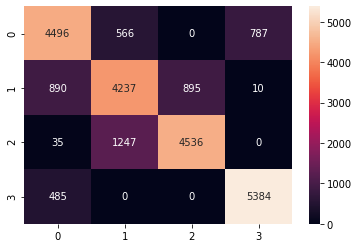

In [36]:
#heatmap for the confusion matrix, for a better visualization.
sns.heatmap(m3_cm, annot=True, fmt='');

In [37]:
# Here are the coefficients for our model.

coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df['intercept'] = model.intercept_
print(coef_df)

     4G_rat   par_day  par_hour   par_min  subscriber_count  \
0  0.013371 -0.010266 -0.021632  0.001125         -0.028433   
1 -0.004927  0.011144  0.013089 -0.005275          0.527526   
2 -0.026619  0.008879  0.026289 -0.034597          0.764441   
3  0.018175 -0.009757 -0.017747  0.038747         -1.263533   

   web_browsing_total_bytes  video_total_bytes  social_ntwrking_bytes  \
0                 -0.059507          -0.064615              -0.059997   
1                  0.386265           0.452662               0.455486   
2                  0.621164           0.687092               0.660270   
3                 -0.947921          -1.075140              -1.055759   

   cloud_computing_total_bytes  web_security_total_bytes  ...  \
0                    -0.055033                 -0.099459  ...   
1                     0.521738                  0.639141  ...   
2                     0.785734                  0.963438  ...   
3                    -1.252438                 -1.503120  

In [38]:
print("Actual counts for each class:")
print(y_test.Congestion_Type.value_counts())
y_pred_df = pd.DataFrame(y_predict, columns=['Congestion_Type'])
print("Predicted counts for each class:")
print(y_pred_df.Congestion_Type.value_counts())

Actual counts for each class:
1    6032
3    5869
0    5849
2    5818
Name: Congestion_Type, dtype: int64
Predicted counts for each class:
3    6181
1    6050
0    5906
2    5431
Name: Congestion_Type, dtype: int64


We can see the actual count for each class and how many we predicted in each class and the difference.